<a href="https://colab.research.google.com/github/mthsansu/MLNLP/blob/main/Code/Descriptive_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><strong><font color="chillipepper">Parlementarian Sentiment Analysis: Descriptive statistics</font></strong></center></h1>
<h5><center><font color="green">You must describe statistically your dataset 
(distribution of words, bi-grams, POS, sentence/document length, most frequent words….) <h3><center>

<center>
April 2022, Houri & Sansu
</center>

## Packages

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime as dt
from nltk.tokenize import TweetTokenizer
import re

## Data

In [67]:
# List of the datasets on which we will apply the operationns
list_data = ['Tweets_sample_confinement.csv', 'Tweets_sample_benalla.csv', 'Tweets_sample_CDM.csv']

In [68]:
# Import data
git_url = "https://raw.githubusercontent.com/mthsansu/MLNLP/main/Data/"
df = pd.read_csv(git_url + 'Tweets_sample_confinement.csv', index_col=0, engine='python')
# df = pd.read_csv('/data/user/s/msansu/MLNLP/Data/' + list_data[2], index_col=0, engine='python')

In [69]:
# Create a date variable
df['date'] = df['created_at'].str[:10]
df['date'] = pd.to_datetime(df['date'])

In [70]:
df.head()

,author_id,possibly_sensitive,id,text,created_at,twitter,sexe,age,majo,num_deptmt,groupe_sigle,parti_ratt_financier,nb_mandats,age_group,date
478,889730003495211009,False,1267043323501580289,La viticulture c’est 600000 emplois dans 66 dé...,2020-05-31T10:40:43.000Z,AdrienMorenas,M,35,True,84,LREM,En marche !,1,2,2020-05-31
480,889730003495211009,False,1266032133497380865,Réunion en visioconférence pour le #GAP #agric...,2020-05-28T15:42:37.000Z,AdrienMorenas,M,35,True,84,LREM,En marche !,1,2,2020-05-28
482,889730003495211009,False,1265595756431409152,Cérémonie patriotique en l'honneur des résista...,2020-05-27T10:48:36.000Z,AdrienMorenas,M,35,True,84,LREM,En marche !,1,2,2020-05-27
484,889730003495211009,False,1265287394724634626,<U+0001F58A> J’ai co-signé le courrier de mon ...,2020-05-26T14:23:17.000Z,AdrienMorenas,M,35,True,84,LREM,En marche !,1,2,2020-05-26
486,889730003495211009,False,1264887573442449408,J’ai saisi ce jour le Directeur général de l’@...,2020-05-25T11:54:32.000Z,AdrienMorenas,M,35,True,84,LREM,En marche !,1,2,2020-05-25


## Word-level preprocessing

In [71]:
# List of words with separator = " "
list_words = df.text.apply(lambda x: x.split(' ')).array
# Flattening to a single list
list_words = [x for X in list_words for x in X]
# Render the number of distinct words in the dataset
print('%s "words" in total for this dataset' % (len(set(list_words))))

147234 "words" in total for this dataset


In [72]:
# Usage of Phrases and Phraser from gensim
import nltk
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
nltk.download('punkt')
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [122]:
# Function to clean the tweets (preprocessing)
def clean(text):
    text = re.sub("@[A-Za-z0-9_]+","", text) # Removing mention
    text = re.sub(r'http\S+', '', text) # Removing link 
    text = re.sub('<.*?>', '', text) # Removing html elements
    text = text.replace('\n',' ') # Removing new line
    text = re.sub("#([a-zA-Z0-9_]{1,50})", '', text) # Removing hashtags
    text = re.sub(' +', ' ', text) # Remove additional spaces
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) # remove emoji
    return text
df["text_clean"] = df["text"].apply(lambda x: clean(x))

In [82]:
# List of cleaned words
list_words_2 = df.text_clean.apply(lambda x: x.split(' ')).array
list_words_2 = [x for X in list_words_2 for x in X]
print('%s cleaned "words" in total for this dataset' % (len(set(list_words_2))))

93487 cleaned "words" in total for this dataset


In [84]:
# List of tokens
list_tokens_1 = df.text.apply(lambda x: TweetTokenizer().tokenize(x)).array
list_tokens_1 = [x for X in list_tokens_1 for x in X]
print('%s tokens in total for this dataset' % (len(set(list_tokens_1))))

92561 tokens in total for this dataset


In [85]:
# List of tokens
list_tokens_2 = df.text_clean.apply(lambda x: TweetTokenizer().tokenize(x)).array
list_tokens_2 = [x for X in list_tokens_2 for x in X]
print('%s "cleaned" tokens in total for this dataset' % (len(set(list_tokens_2))))

54225 "cleaned" tokens in total for this dataset


## First statistics on the complete set of data

In [59]:
# Number of different tweets in the database
print(len(df.id.unique()),"tweets in total")

32767 tweets in total


In [60]:
# Number of different MPs in the database
print(len(df.author_id.unique()),"distinct authors")

487 distinct authors


In [61]:
# Distribution of tweets considered as possibly sensitive
print("Distribution of tweets considered as possibly sensitive \n", df.possibly_sensitive.value_counts())

Distribution of tweets considered as possibly sensitive 
 False    32552
True       215
Name: possibly_sensitive, dtype: int64


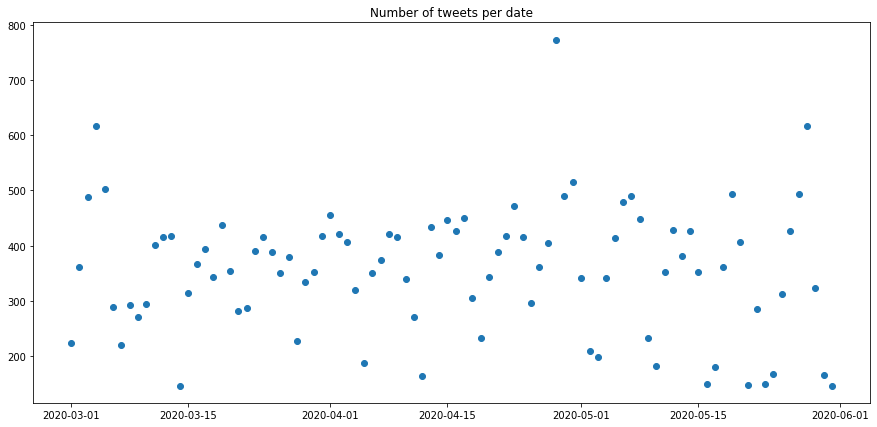

In [62]:
# Plot the number of tweets per date
x = df.date.value_counts().index # Get the date as x-axis
y = df.date.value_counts() # Get the number of tweets per date as y-axis
figure(figsize=(15, 7))
plt.title('Number of tweets per date')
plt.plot_date(x, y, xdate=True)
plt.show() # Plot the graph

Number of tweets done by MPs age:


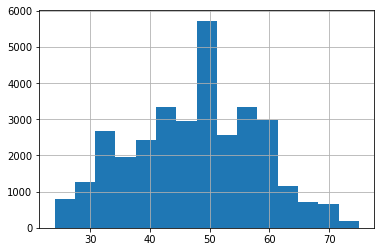

In [20]:
print("Number of tweets done by MPs age:")
df.age.hist(bins=15)

Number of tweets done by political group:


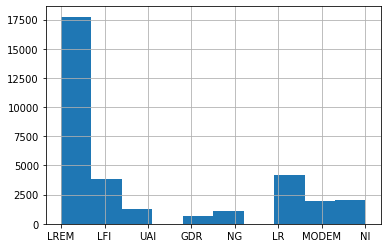

In [21]:
print("Number of tweets done by political group:")
df.groupe_sigle.hist()

In [22]:
print("Distribution of tweets by gender \n", df.sexe.value_counts())

Distribution of tweets by gender 
 M    19966
F    12801
Name: sexe, dtype: int64


In [23]:
print("Distribution of tweets by number of mandates \n", df.nb_mandats.value_counts())

Distribution of tweets by number of mandates 
 1    24594
2     7576
3      597
Name: nb_mandats, dtype: int64


In [24]:
print("Distribution of tweets according to majority belonging \n", df.majo.value_counts())

Distribution of tweets according to majority belonging 
 True     21179
False    11588
Name: majo, dtype: int64


## Some statistics on tweets themselves

In [86]:
# Mean length of tweets in characters
print("Mean length of tweets in characters:",df.text.apply(len).mean())

Mean length of tweets in characters: 255.04104739524522


In [87]:
# Number of "words": we split by a space(naive approach)
df['words_len'] = df.text_clean.apply(lambda x: len(x.split(' ')) )

In [88]:
# Mean length of tweets in characters
print("Mean length of tweets in characters:",df.words_len.mean())

Mean length of tweets in characters: 33.60155034028138


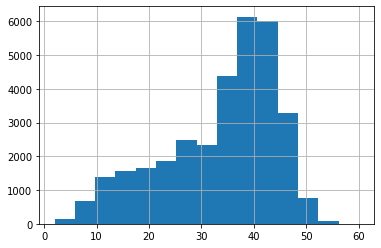

In [89]:
# Distribution of tweets according to length in words
df.words_len.hist(bins=15)

In [133]:
# Storing the average word length for each tweet
df["chr_len_words"] = df['text_clean'].str.split(' |-').\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x))

In [140]:
# # Outlier observation to deal with later
# df[df["chr_len_words"]  == 13.5] # c'est à cause de l'accent, donc je supprime pour le moment mais on verra plus tard

In [129]:
# # Remove outliers
# df = df.drop(495518, axis=0)
# df = df.drop(449536, axis=0)

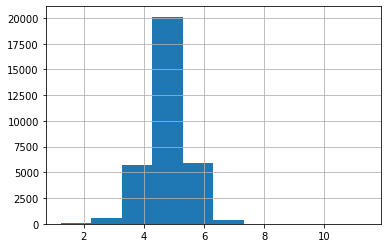

In [139]:
# Distribution of tweets according to average words length
df.chr_len_words.hist()

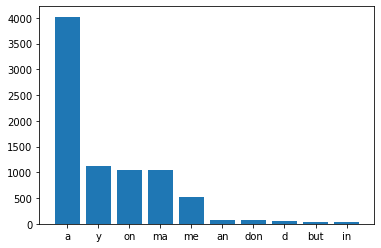

In [149]:
# Analysis of stopwords
# Code taken from: https://app.neptune.ai/neptune-ai/eda-nlp-tools/n/1-3-top-stopwords-barchart-b953763c-3fea-4331-bff0-429411793e5f/5c0fca05-ba07-4564-a02e-c44b08bfb8cb
import nltk
from nltk.corpus import stopwords
stop=set(stopwords.words('french'))

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= df.text_clean.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(df["text_clean"])

## Specificity of tweet contents

In [ ]:
# We want to match some specificity of Twitter contents and render it
hash_prog = re.compile('#') # matching hash
mention_prog = re.compile('@[A-Za-z0-9_]+') # matching mention
link_prog = re.compile(r'http\S+') # # matching url
emoji_prog = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", flags=re.UNICODE)
# Calculating number of matches for every tweet
progs = [hash_prog, mention_prog, link_prog, emoji_prog]
nb_types = ['hash', 'mention', 'link', 'emoji']
for prog, nb_type in zip(progs, nb_types):
  df[nb_type] = df['text'].apply(lambda x: len(prog.split(x))-1).array